# Test TimeSeries

In [2]:
import pandas as pd
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
import sklearn
from sklearn import linear_model
import sklearn.metrics as metrics


In [3]:
df=pd. read_csv('81250_202212_DrumCurrent.csv', engine='python', encoding='utf-8', error_bad_lines=False)
df

,floatvalue,t_stamp,tagpath
0,19.122263,1669852813288,edge nodes/tyson/wl_81250l1freezer/drum_vfd_fd...
1,19.130331,1669852833289,edge nodes/tyson/wl_81250l1freezer/drum_vfd_fd...
2,19.190773,1669852873291,edge nodes/tyson/wl_81250l1freezer/drum_vfd_fd...
3,19.097614,1669852893292,edge nodes/tyson/wl_81250l1freezer/drum_vfd_fd...
4,19.216280,1669852913293,edge nodes/tyson/wl_81250l1freezer/drum_vfd_fd...
...,...,...,...
113671,30.000000,1672525215272,edge nodes/tyson/wl_81250l1freezer/drum01_rete...
113672,30.000000,1672526415347,edge nodes/tyson/wl_81250l1freezer/drum01_rete...
113673,30.000000,1672527615416,edge nodes/tyson/wl_81250l1freezer/drum01_rete...
113674,30.000000,1672528815487,edge nodes/tyson/wl_81250l1freezer/drum01_rete...


In [4]:
df.dtypes

floatvalue    float64
t_stamp         int64
tagpath        object
dtype: object

In [5]:
print("Rows:", df.shape[0])

Rows: 113676


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113676 entries, 0 to 113675
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   floatvalue  113676 non-null  float64
 1   t_stamp     113676 non-null  int64  
 2   tagpath     113676 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ MB


# Cleaning the Data

In [7]:
df=df.drop(columns=['tagpath'])
df.index.freq="MS"
df['t_stamp']= pd.to_datetime(df['t_stamp'], unit='ms') ##, unit='ms'
#df=df.iloc[3535:9200]
df

,floatvalue,t_stamp
0,19.122263,2022-12-01 00:00:13.288
1,19.130331,2022-12-01 00:00:33.289
2,19.190773,2022-12-01 00:01:13.291
3,19.097614,2022-12-01 00:01:33.292
4,19.216280,2022-12-01 00:01:53.293
...,...,...
113671,30.000000,2022-12-31 22:20:15.272
113672,30.000000,2022-12-31 22:40:15.347
113673,30.000000,2022-12-31 23:00:15.416
113674,30.000000,2022-12-31 23:20:15.487


<AxesSubplot:>

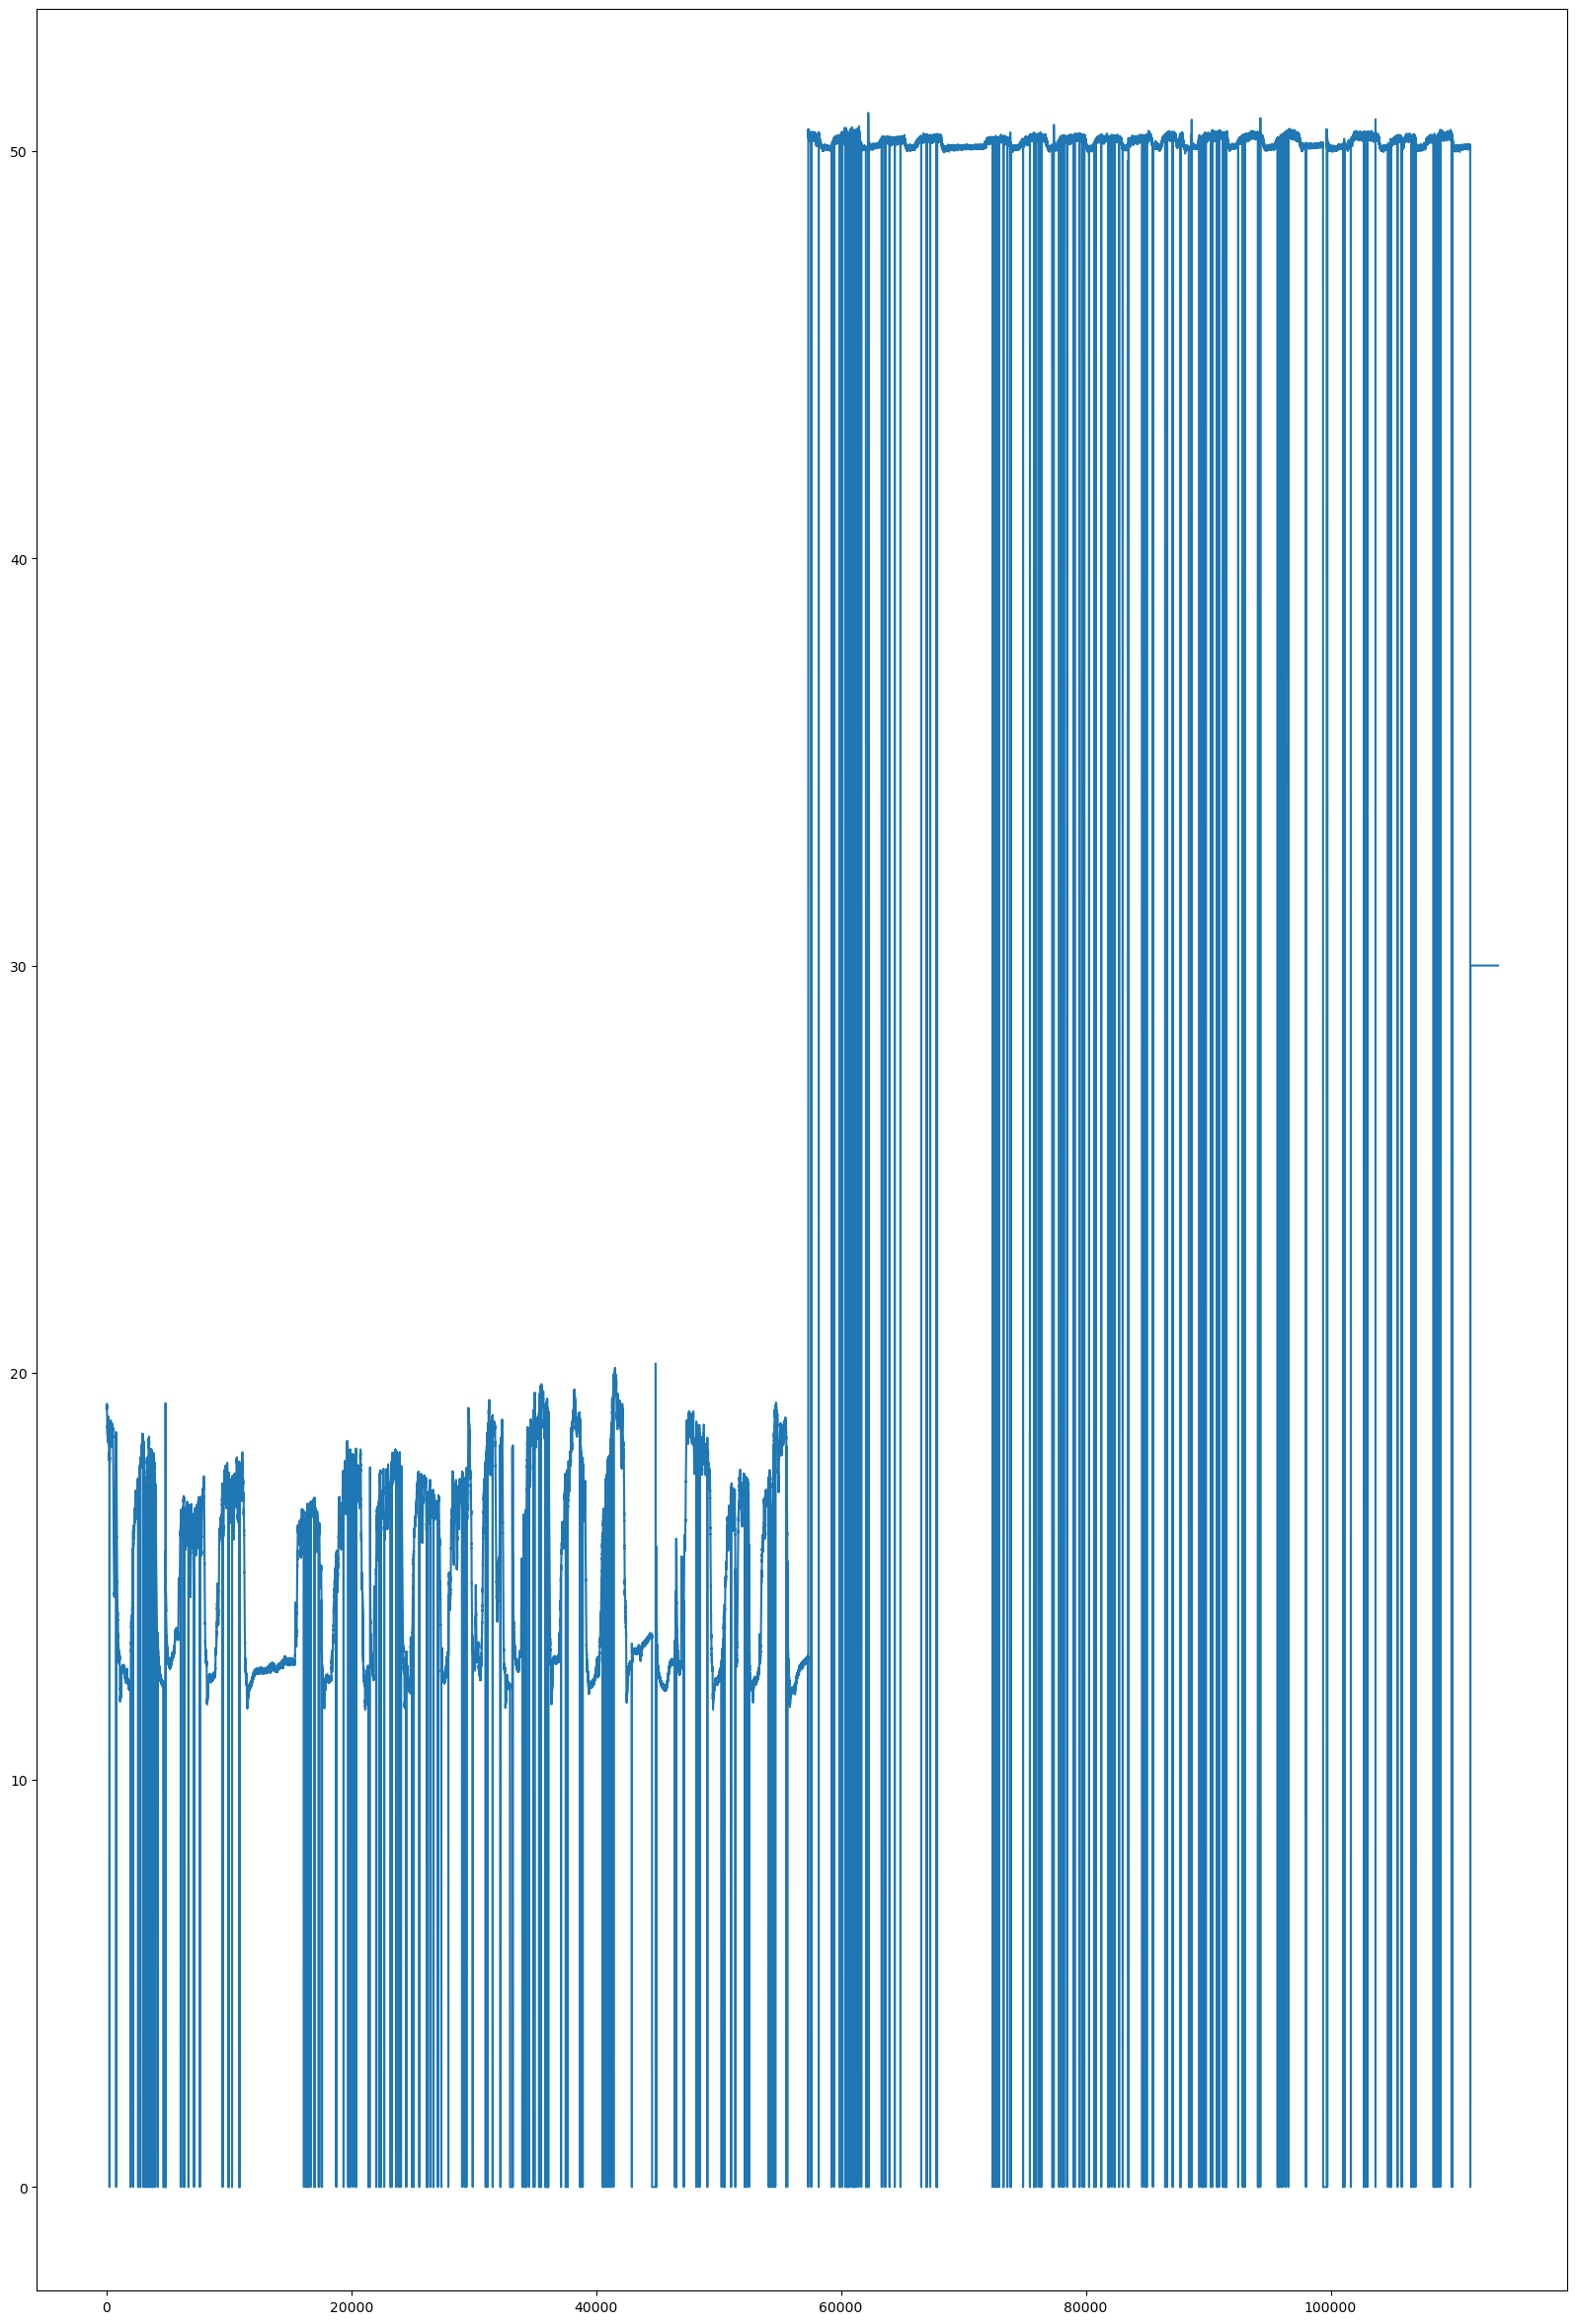

In [8]:
df['floatvalue'].plot(figsize=(20,30))

In [9]:
df.dtypes

floatvalue           float64
t_stamp       datetime64[ns]
dtype: object

In [10]:
days = []
hours = []
minutes = []
Mseconds=[]

for t in df['t_stamp']:
    days.append(t.day)
    hours.append(t.hour)
    minutes.append(t.minute)
    Mseconds.append(t.second)
    #time=minutes*60+Mseconds
    

df['days']=days
df['hour']= hours
df['minute']=minutes
df['second']=Mseconds
#df['totaltime']=time

df.head(10), df.tail()

(   floatvalue                 t_stamp  days  hour  minute  second
 0   19.122263 2022-12-01 00:00:13.288     1     0       0      13
 1   19.130331 2022-12-01 00:00:33.289     1     0       0      33
 2   19.190773 2022-12-01 00:01:13.291     1     0       1      13
 3   19.097614 2022-12-01 00:01:33.292     1     0       1      33
 4   19.216280 2022-12-01 00:01:53.293     1     0       1      53
 5   19.159227 2022-12-01 00:02:13.294     1     0       2      13
 6   19.195217 2022-12-01 00:02:53.296     1     0       2      53
 7   19.110958 2022-12-01 00:03:33.298     1     0       3      33
 8   19.163975 2022-12-01 00:04:13.301     1     0       4      13
 9   19.106945 2022-12-01 00:04:33.302     1     0       4      33,
         floatvalue                 t_stamp  days  hour  minute  second
 113671        30.0 2022-12-31 22:20:15.272    31    22      20      15
 113672        30.0 2022-12-31 22:40:15.347    31    22      40      15
 113673        30.0 2022-12-31 23:00:15.416   

In [11]:
a=df['days']*3600*24+df['hour']*3600+df['minute']*60+df['second']

df['new_time']=a
df

,floatvalue,t_stamp,days,hour,minute,second,new_time
0,19.122263,2022-12-01 00:00:13.288,1,0,0,13,86413
1,19.130331,2022-12-01 00:00:33.289,1,0,0,33,86433
2,19.190773,2022-12-01 00:01:13.291,1,0,1,13,86473
3,19.097614,2022-12-01 00:01:33.292,1,0,1,33,86493
4,19.216280,2022-12-01 00:01:53.293,1,0,1,53,86513
...,...,...,...,...,...,...,...
113671,30.000000,2022-12-31 22:20:15.272,31,22,20,15,2758815
113672,30.000000,2022-12-31 22:40:15.347,31,22,40,15,2760015
113673,30.000000,2022-12-31 23:00:15.416,31,23,0,15,2761215
113674,30.000000,2022-12-31 23:20:15.487,31,23,20,15,2762415


In [12]:
df.dtypes

floatvalue           float64
t_stamp       datetime64[ns]
days                   int64
hour                   int64
minute                 int64
second                 int64
new_time               int64
dtype: object

In [13]:
#from statsmodels.tsa.stattools import adfuller

In [14]:
#adftest=adfuller(y)

In [15]:
#print("pvalue of adftest test is: ", adftest[1])

# 

# Traing data

In [16]:
X=df.iloc[:15000,0:2] # diaplay floatvalue X= input
y=df.iloc[15000:17500,1] ##dataframe.iloc[row, column]
X

,floatvalue,t_stamp
0,19.122263,2022-12-01 00:00:13.288
1,19.130331,2022-12-01 00:00:33.289
2,19.190773,2022-12-01 00:01:13.291
3,19.097614,2022-12-01 00:01:33.292
4,19.216280,2022-12-01 00:01:53.293
...,...,...
14995,12.880530,2022-12-08 11:18:18.972
14996,12.876314,2022-12-08 11:18:58.975
14997,12.837649,2022-12-08 11:19:18.976
14998,12.841898,2022-12-08 11:19:38.977


In [17]:
y ## will test in next 7 hours 

15000   2022-12-08 11:20:38.981
15001   2022-12-08 11:20:58.982
15002   2022-12-08 11:21:18.983
15003   2022-12-08 11:22:58.989
15004   2022-12-08 11:23:38.993
                  ...          
17495   2022-12-09 06:19:24.471
17496   2022-12-09 06:19:44.472
17497   2022-12-09 06:20:44.478
17498   2022-12-09 06:21:04.479
17499   2022-12-09 06:21:44.483
Name: t_stamp, Length: 2500, dtype: datetime64[ns]

In [18]:
to_row= int(len(X)*0.9)
training_data=list(X[:to_row]['floatvalue'])
Testing_data=list(X[to_row:]['floatvalue'])

In [19]:
len(training_data)

13500

In [21]:
len(Testing_data)

1500

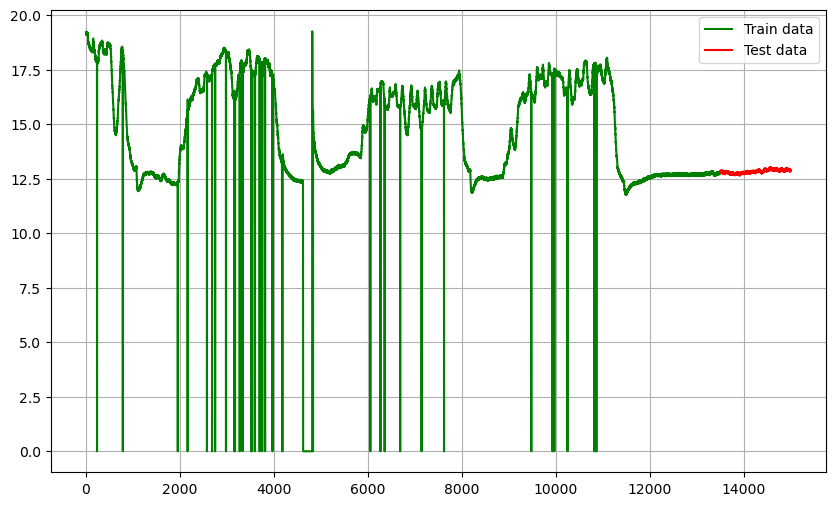

In [82]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(X[:to_row]['floatvalue'],'green',label='Train data')
plt.plot(X[to_row:]['floatvalue'], 'red', label='Test data')
plt.legend()

# Checking 

In [44]:
from statsmodels.tsa.stattools import adfuller,acf

In [45]:
adftest=adfuller(training_data)

In [46]:
print("pvalue of adftest test is: ", adftest[1])

pvalue of adftest test is:  1.384230900270585e-05


# Creating the Mode 

In [78]:
import math
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [63]:
model_predictions=[]
n_test_obser=len(Testing_data)

In [64]:
len(model_predictions)

0

In [65]:
import pandas as pd

In [82]:
model=ARIMA(training_data, order=(1,1,0))
model_fit=model.fit()
#forecast
fc,se=model_fit.forecast()

# make pd
fc_series=pd.Series(fc, index=Testing_data.index)

#plot
plt.figure(figsize=(15,9))
plt.grid(True)
plt.plot(training_data,label="training")
plt.plot(Testing_data,label="actual")
plt.plot(fc_series,label="forecast")
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

In [91]:
len(model_predictions)

1500

In [1]:
output.shape()

NameError: name 'output' is not defined

In [93]:
len(model_predictions)

1500

In [94]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                14999
Model:                ARIMA(10, 1, 0)   Log Likelihood              -20239.104
Date:                Tue, 07 Feb 2023   AIC                          40500.208
Time:                        10:56:16   BIC                          40583.981
Sample:                             0   HQIC                         40528.003
                              - 14999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0030      0.010     -0.285      0.776      -0.023       0.017
ar.L2         -0.6407      0.001   -452.982      0.000      -0.643      -0.638
ar.L3         -0.0619      0.008     -7.575      0.000      -0.078      -0.046
ar.L4         -0.4291      0.002   -190.567      0.000      -0.434      -0.425
ar.L5         -0.0709      0.008     -9.214      0.000      -0.086      -0.056
ar.L6         -0.2814      0.003    -85.787      0.000      -0.288      -0.275
ar.L7         -0.0564      0.008     -6.733      0.000      -0.073      -0.040
ar.L8         -0.1776      0.004    -46.163      0.000      -0.185      -0.170
ar.L9         -0.0320      0.009     -3.639      0.000      -0.049      -0.015
ar.L10        -0.0627      0.004    -16.475      0.000      -0.070      -0.055
sigma2         0.8702      0.001    991.863      0.000       0.868       0.872
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):          44123544.78
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                           -11.84
Prob(H) (two-sided):                  0.00   Kurtosis:                       267.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
len(model_predictions)

1500

In [96]:
len(Testing_data)

1500

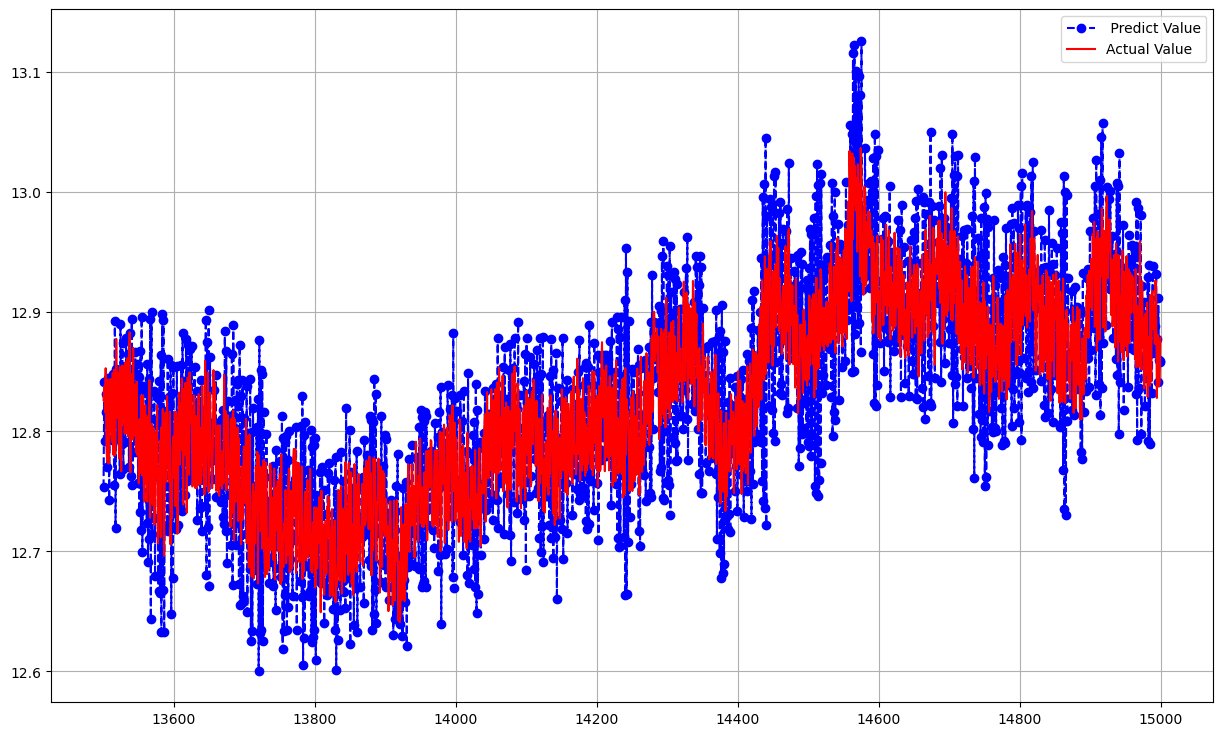

In [97]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range=X[to_row:].index
plt.plot(date_range,model_predictions,color='blue', marker='o',linestyle='dashed',label=' Predict Value')
plt.plot(date_range,Testing_data,color='red',label='Actual Value')
plt.legend()
plt.show()